# DBSCAN 

In [1]:
import pandas as pd
dataset_1 = pd.read_csv('blobs.csv')[:80].values


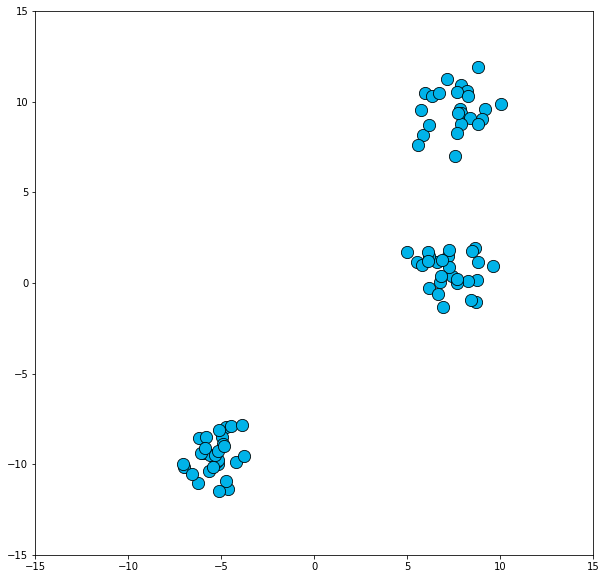

In [2]:
%matplotlib inline

import dbscan_lab_helper as helper
    
helper.plot_dataset(dataset_1)

In [3]:
from sklearn import cluster

#creating an instance of DBSCAN
dbscan = cluster.DBSCAN()

#fitting and predicting data
clustering_labels_1 = dbscan.fit_predict(dataset_1)

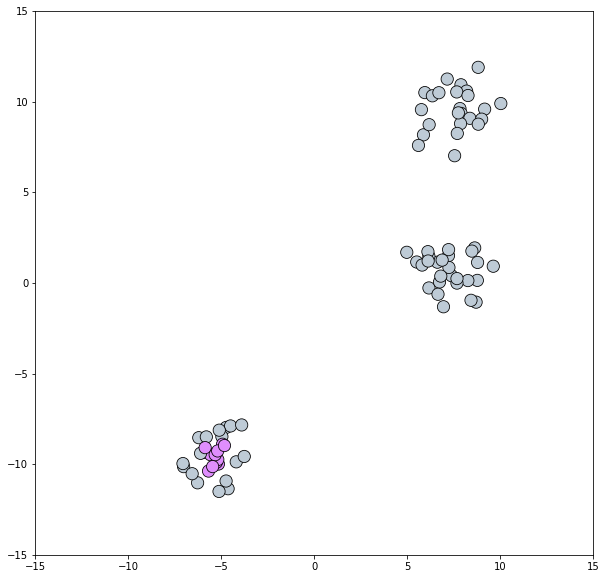

In [4]:
# Plot clustering
helper.plot_clustered_dataset(dataset_1, clustering_labels_1)

As you see, we will have to make some tweaks. Let's start by looking at Epsilon, the radius of each point's neighborhood. The default value in sklearn is 0.5.

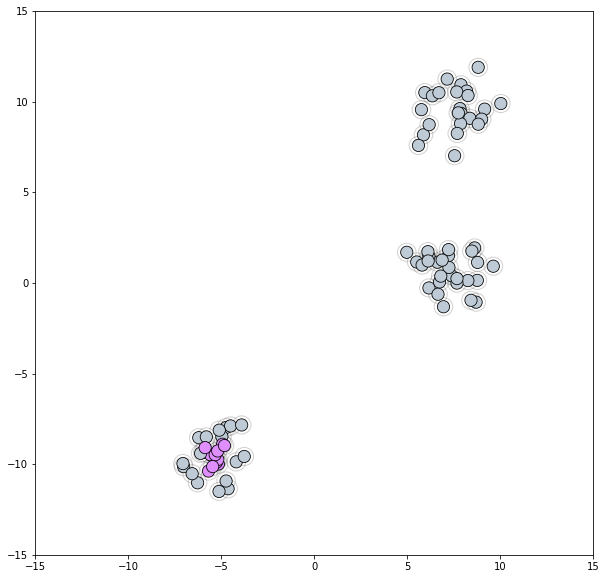

In [5]:
# Plotting clustering with neighborhoods
helper.plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)


From the graph, we can see that an Epsilon value of 0.5 is too small for this dataset. We need to increase it so the points in a blob overlap each others' neighborhoods, but not to the degree where a single cluster would span two blobs

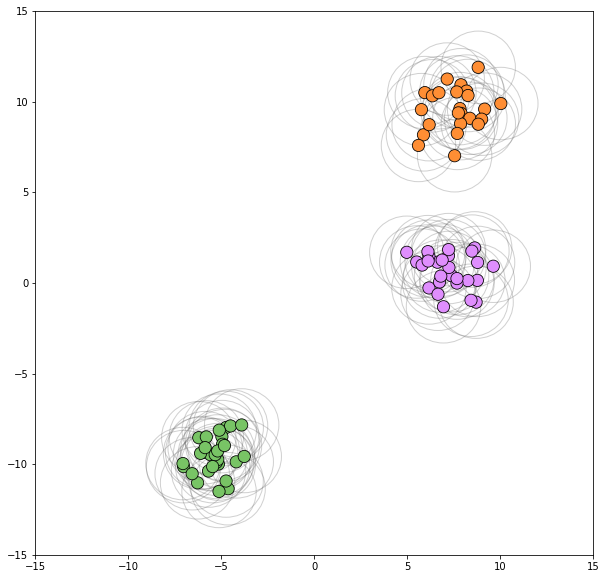

In [6]:
# increasing the value of epsilon to allow DBSCAN to find three clusters in the dataset
epsilon=2

# Clustering
dbscan = cluster.DBSCAN(eps=epsilon)
clustering_labels_2 = dbscan.fit_predict(dataset_1)

# Plotting
helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=epsilon)

## Dataset 2

In [7]:
dataset_2 = pd.read_csv('varied.csv')[:300].values

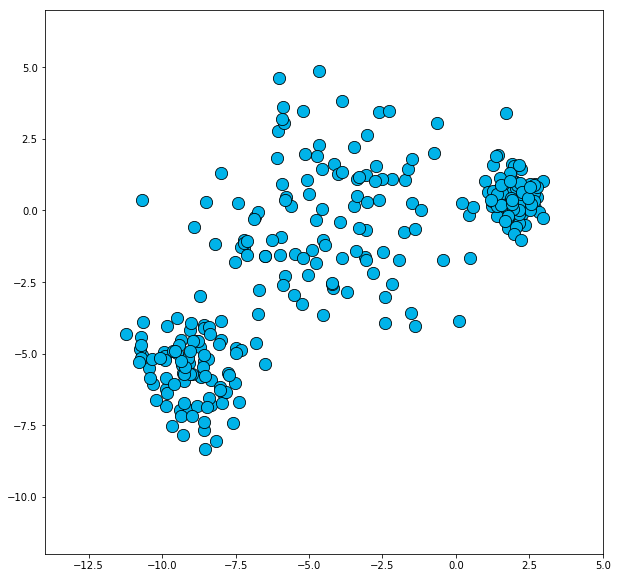

In [8]:
# Plotting
helper.plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))

In [9]:
# Cluster with DBSCAN with default parameters
dbscan = cluster.DBSCAN()

clustering_labels_3 = dbscan.fit_predict(dataset_2)

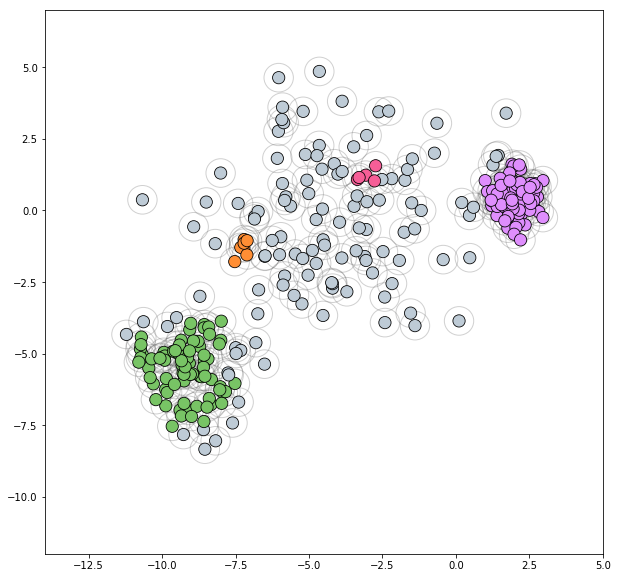

In [10]:
# Plotting
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_3, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:
 * **Scenario** 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
 * **Scenario 2**: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise. 


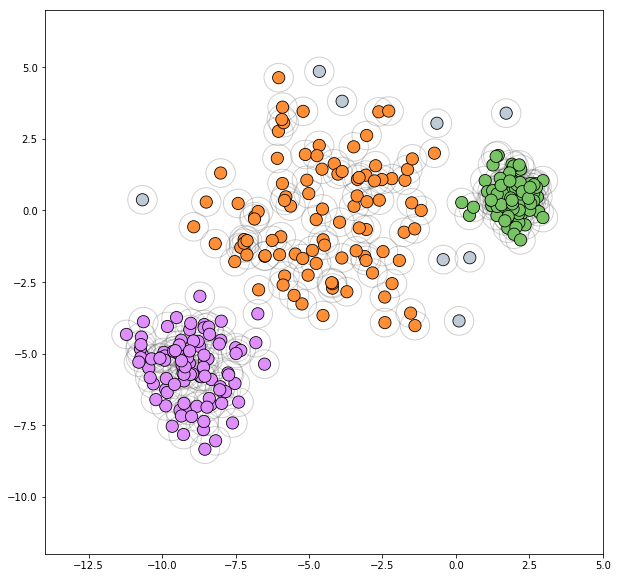

In [12]:
# Scenario 1
eps=1.3
min_samples=5

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

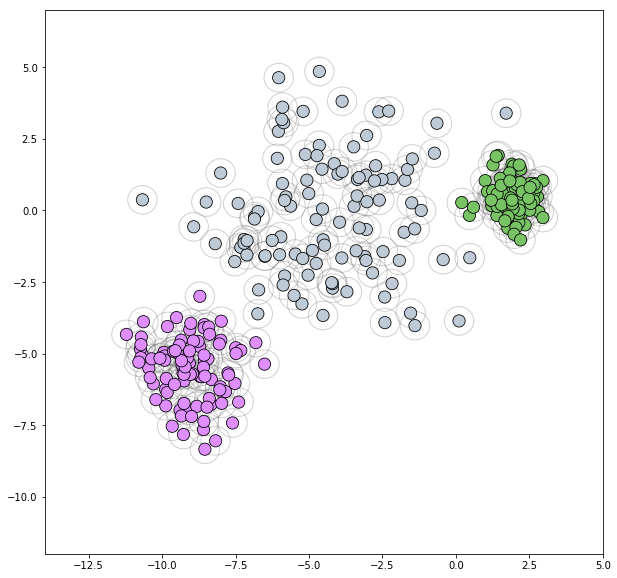

In [13]:
# Scenario 2
eps=1.3
min_samples=20

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)